In [1]:
import pandas as pd
import os

In [2]:
#print(os.access(r'E:\GitHub\Bati_bank\data-20250122T080256Z-001\data.csv', os.R_OK))

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bati-Bank_Credit-Scoring-Model/data/data.csv')


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_info = data.info()
data_shape = data.shape
data_info, data_shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

(None, (95662, 16))

In [5]:
print(data.head())

         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

      ProductCategory    ChannelId   Amount  Value  TransactionStart

In [6]:
print(data.describe(include='all'))

              TransactionId        BatchId       AccountId  \
count                 95662          95662           95662   
unique                95662          94809            3633   
top     TransactionId_76871  BatchId_67019  AccountId_4841   
freq                      1             28           30893   
mean                    NaN            NaN             NaN   
std                     NaN            NaN             NaN   
min                     NaN            NaN             NaN   
25%                     NaN            NaN             NaN   
50%                     NaN            NaN             NaN   
75%                     NaN            NaN             NaN   
max                     NaN            NaN             NaN   

             SubscriptionId       CustomerId CurrencyCode  CountryCode  \
count                 95662            95662        95662      95662.0   
unique                 3627             3742            1          NaN   
top     SubscriptionId_3829  Cust

In [7]:
print(data.describe())  # Numerical feature statistics


       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000


In [8]:
print(data['ProductCategory'].value_counts())  #For categorical feature

ProductCategory
financial_services    45405
airtime               45027
utility_bill           1920
data_bundles           1613
tv                     1279
ticket                  216
movies                  175
transport                25
other                     2
Name: count, dtype: int64


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

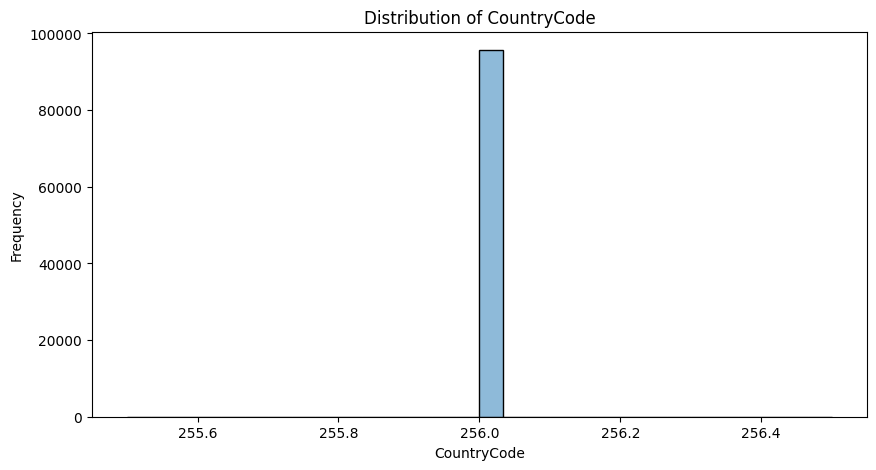

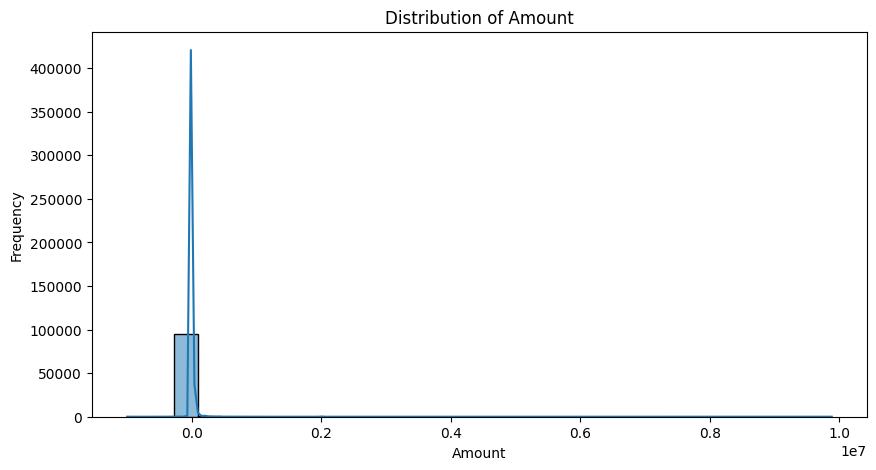

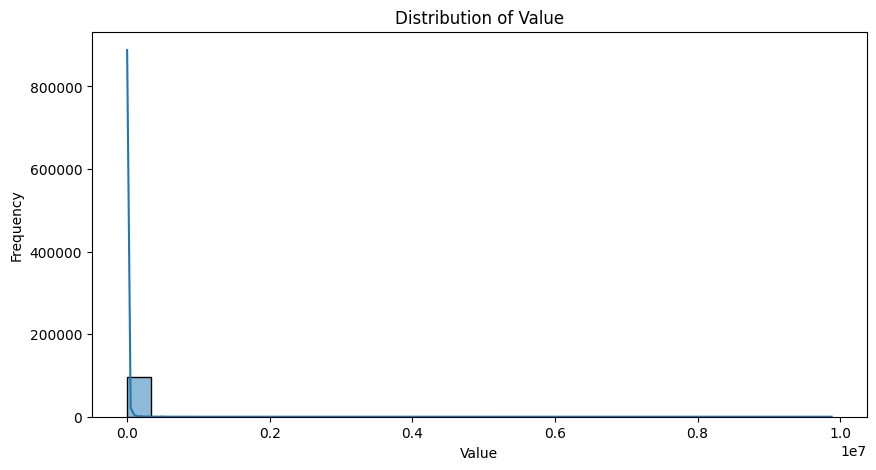

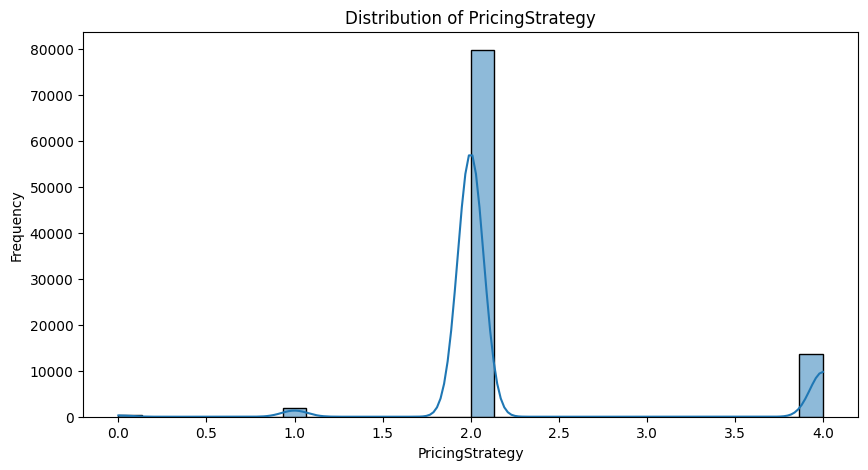

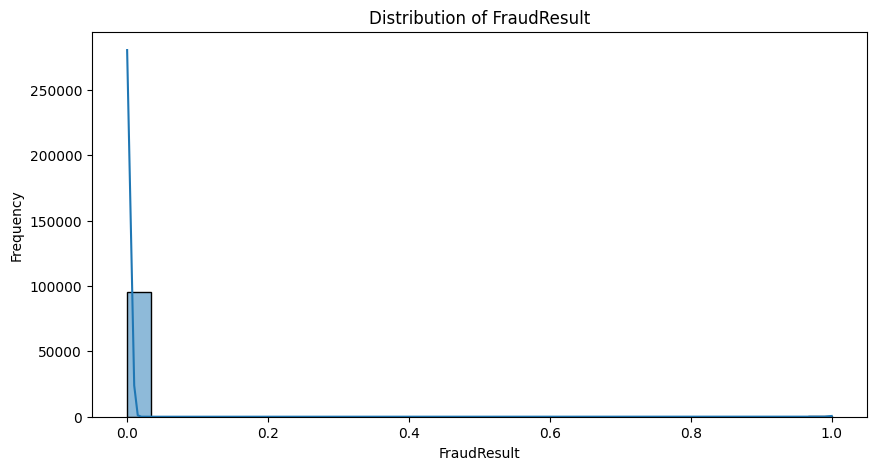

In [10]:
# Plot histograms for numerical features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns

for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

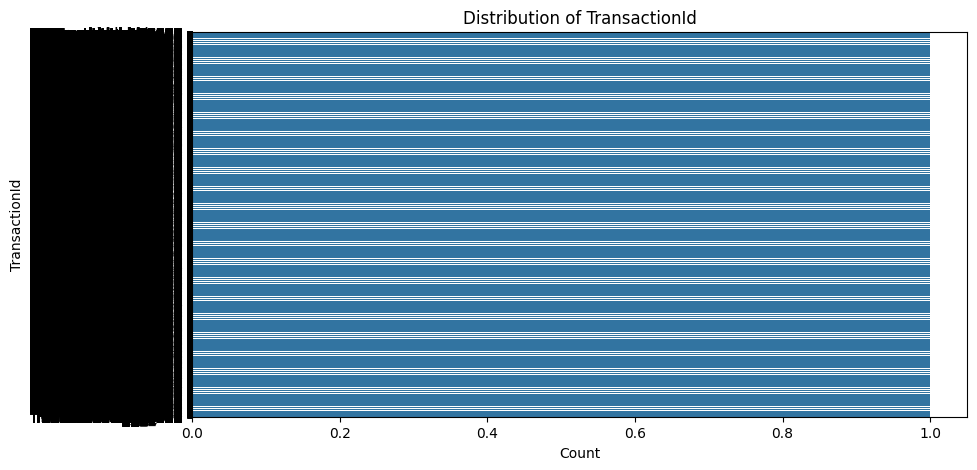

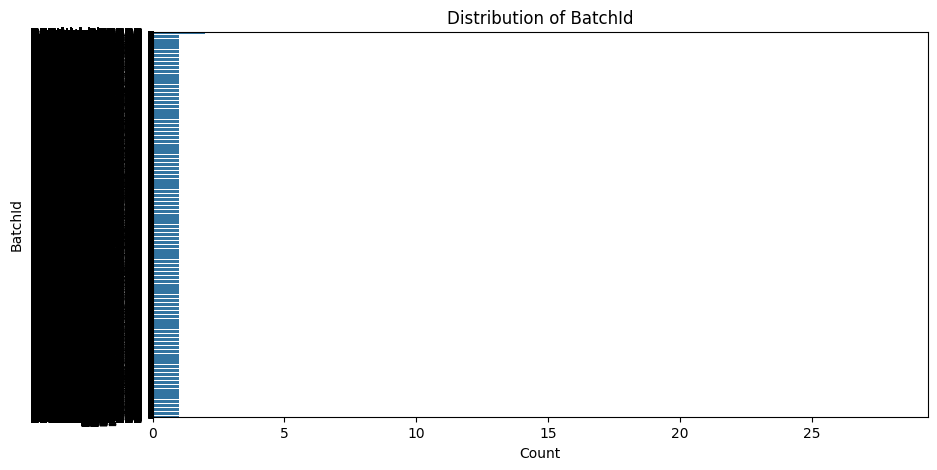

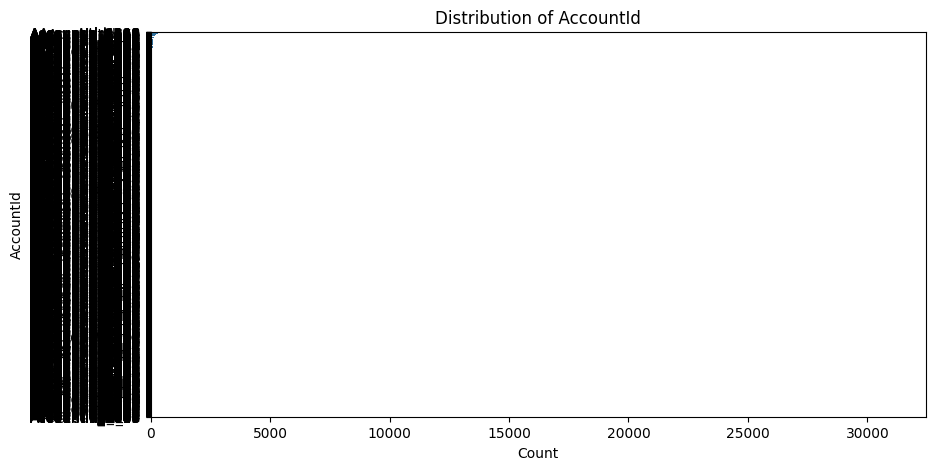

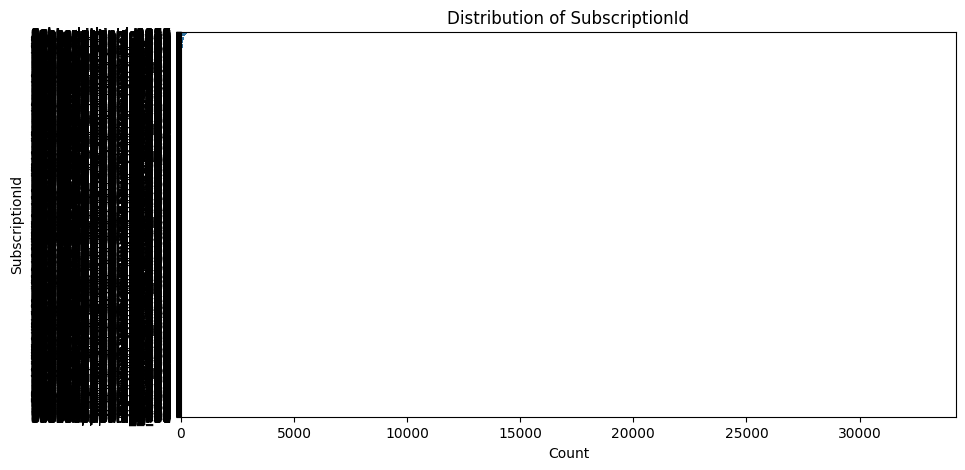

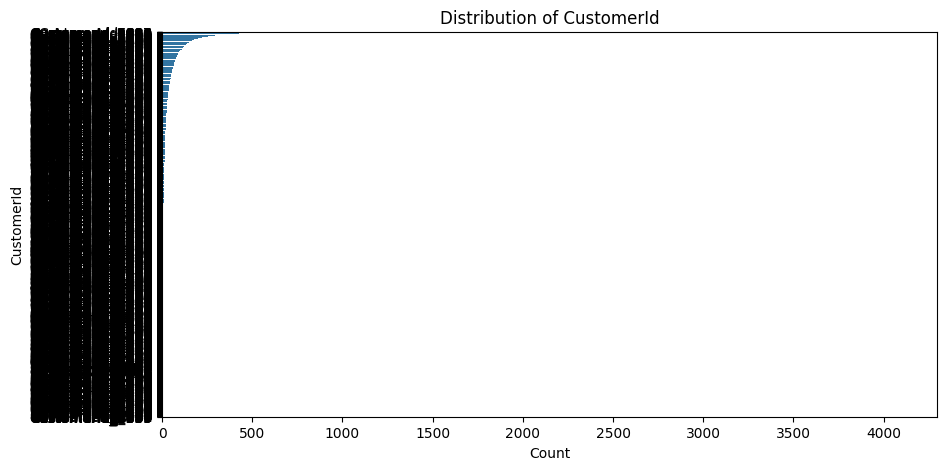

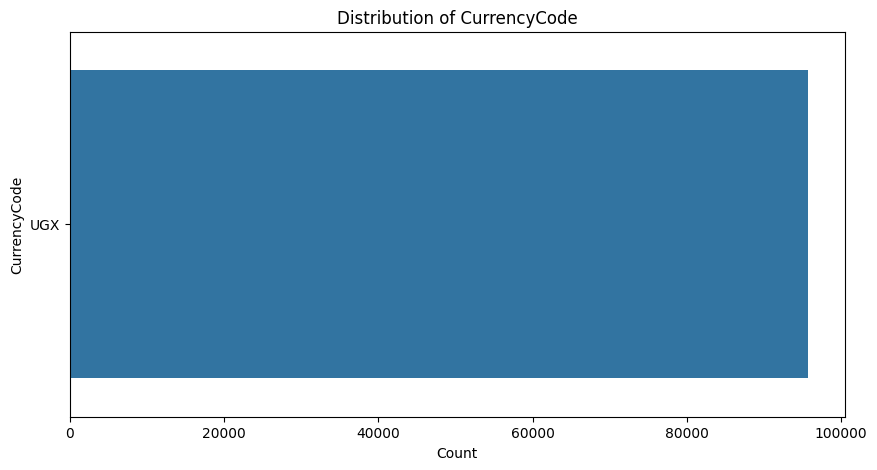

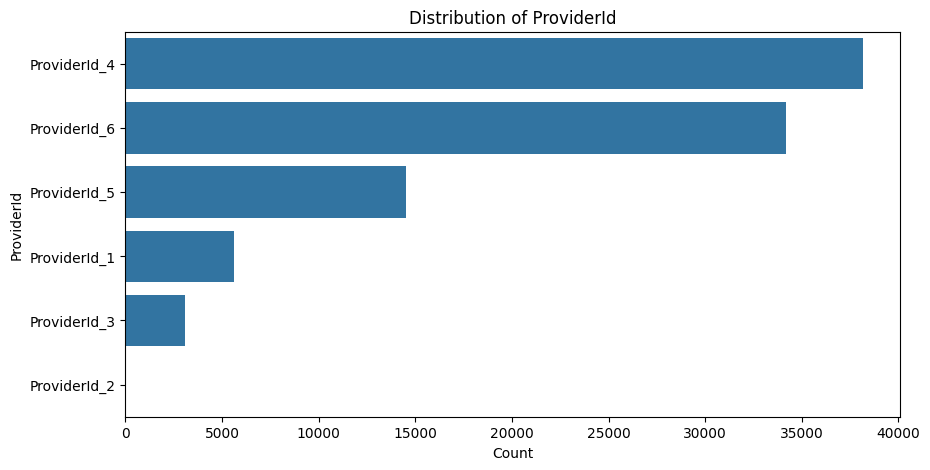

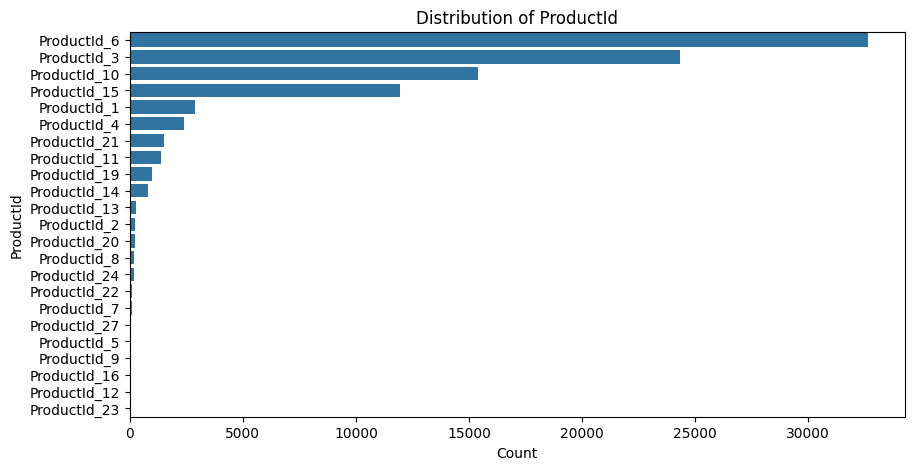

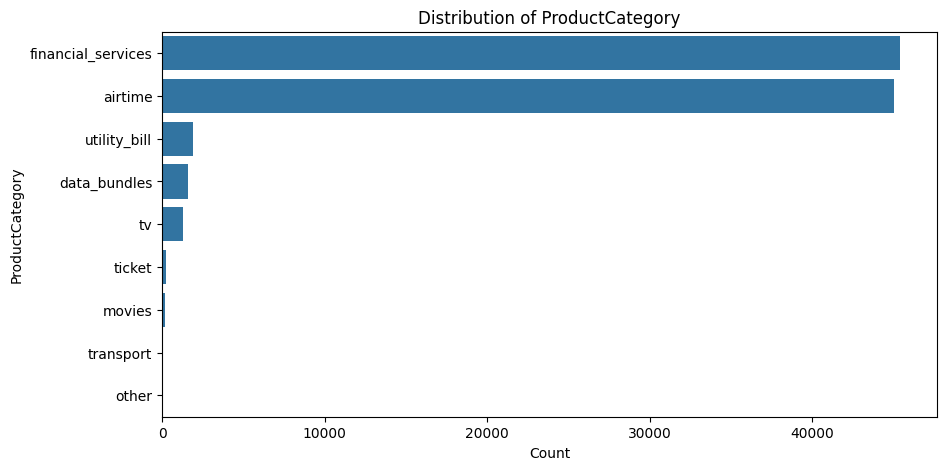

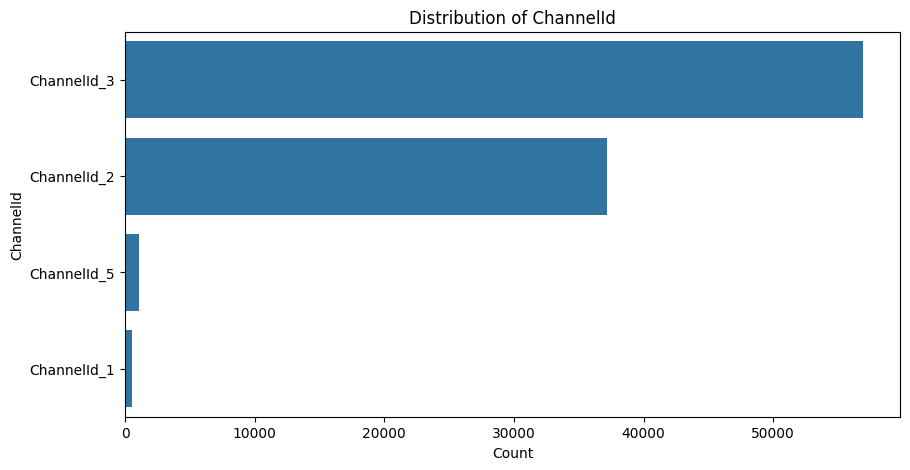

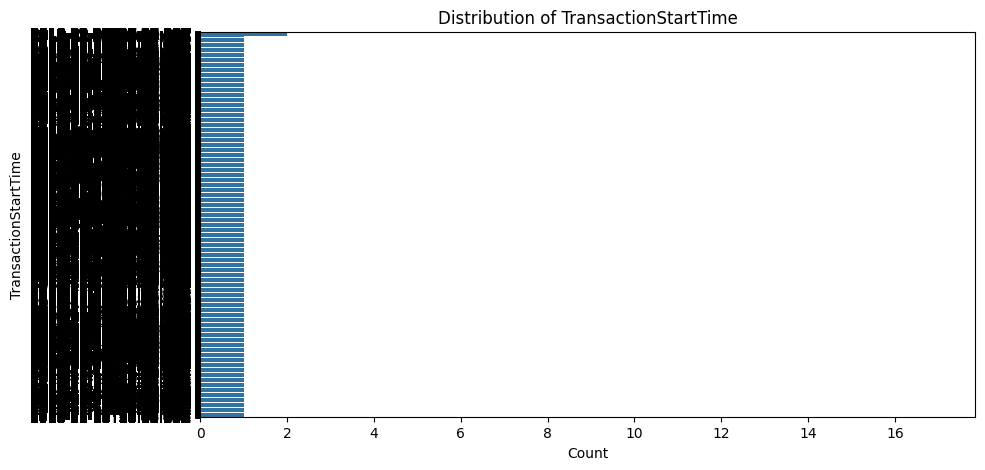

In [11]:
# Plot bar charts for categorical features
categorical_features = data.select_dtypes(include=['object']).columns

for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=data[feature], order=data[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)
    plt.show()

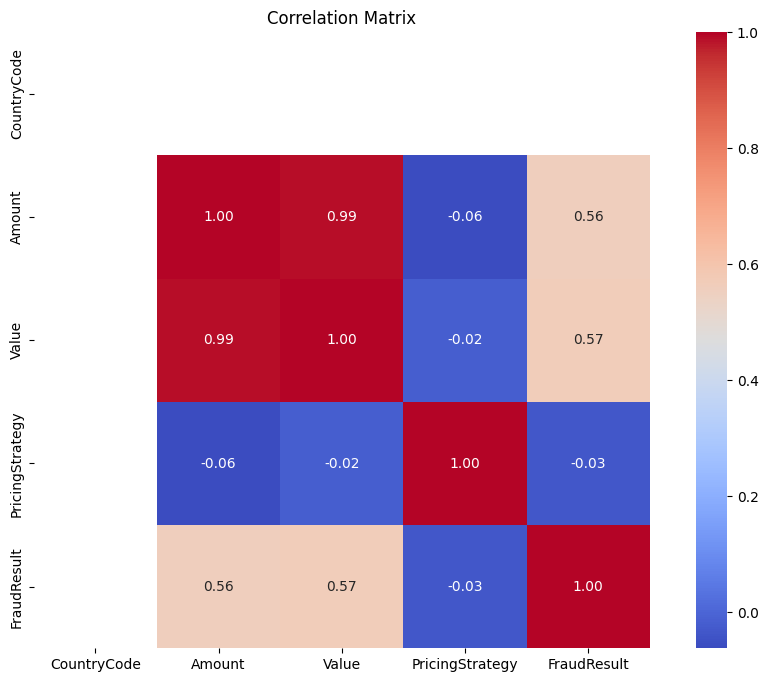

In [12]:
# Correlation matrix
correlation_matrix = data[numerical_features].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [13]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

,0


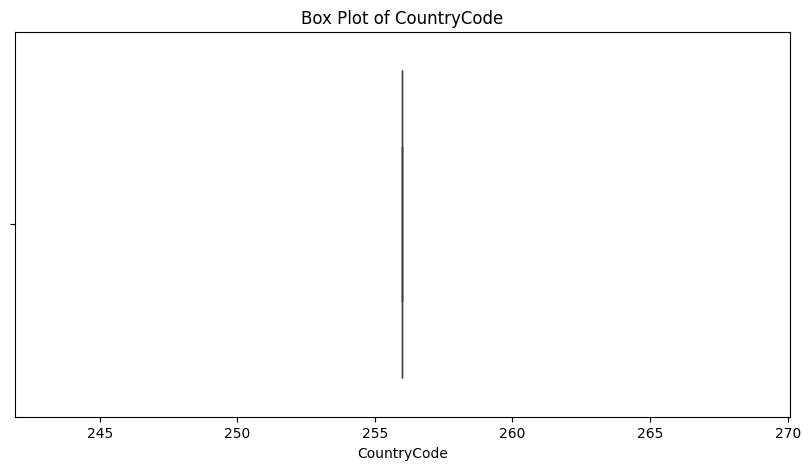

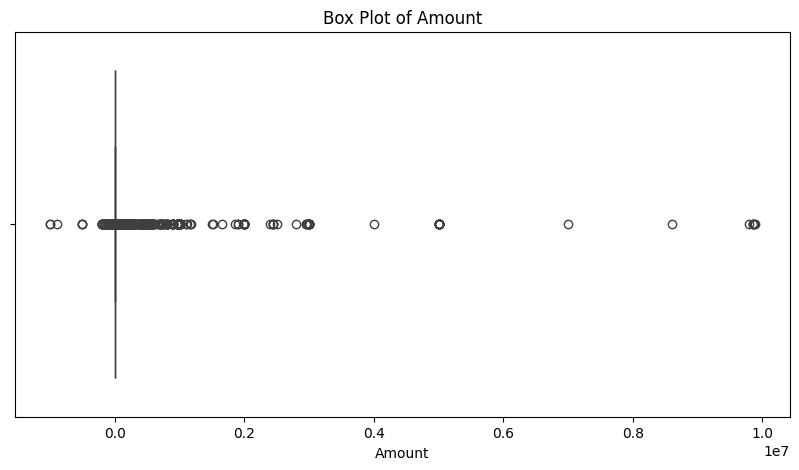

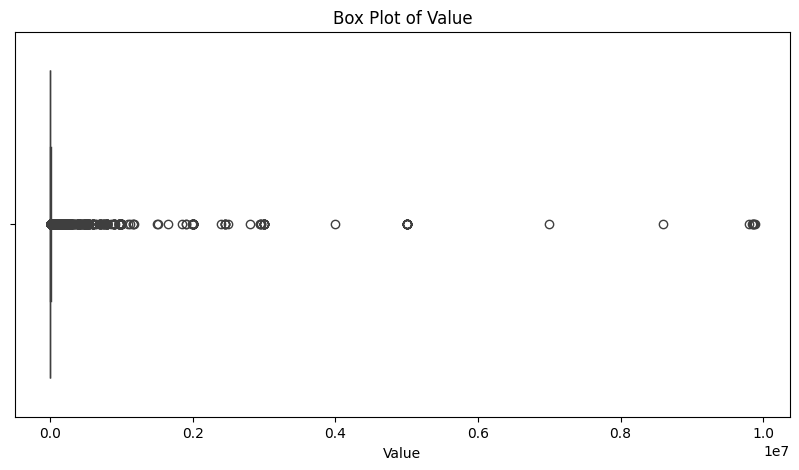

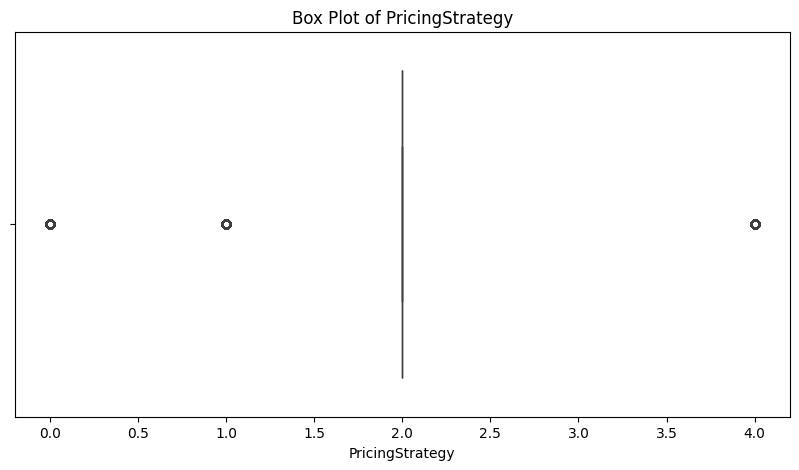

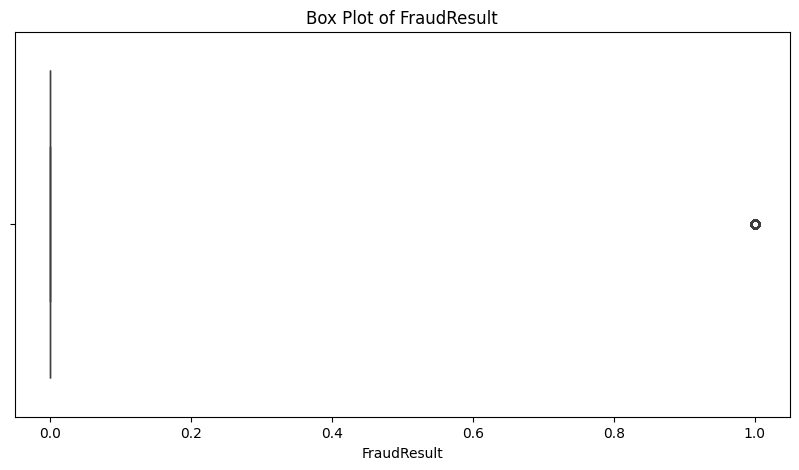

In [14]:
# Box plots for outlier detection
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
    plt.show()